# 데이터 읽기

In [68]:
import pandas as pd
cust=pd.read_csv('customer_master.csv')
cust.head()
item=pd.read_csv('item_master.csv')
item.head()
tran1=pd.read_csv('transaction_1.csv')
tran1.head()
tran2=pd.read_csv('transaction_2.csv')
tran2.head()
detail1=pd.read_csv('transaction_detail_1.csv')
detail1.head()
detail2=pd.read_csv('transaction_detail_2.csv')
detail2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


# 데이터 결합

In [2]:
tran=pd.concat([tran1,tran2],ignore_index=True)  # concat 단순연결
tran.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [3]:
print(len(tran)) ; print(len(tran1)) ; print(len(tran2))

6786
5000
1786


In [4]:
tran_de=pd.concat([detail1,detail2],ignore_index=True)
tran_de.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [5]:
print(len(detail1)) ; print(len(detail2)) ; print(len(tran_de))

5000
2144
7144


In [6]:
tran_join=pd.merge(tran_de,tran[['transaction_id','payment_date','customer_id']],on='transaction_id',how='left')
tran_join.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [7]:
tran_join.isnull().sum()

detail_id         0
transaction_id    0
item_id           0
quantity          0
payment_date      0
customer_id       0
dtype: int64

In [8]:
tran_join=pd.merge(tran_join,cust,on='customer_id',how='left')
tran_join=pd.merge(tran_join,item,on='item_id',how='left')

In [9]:
tran_join.head()
tran_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   detail_id          7144 non-null   int64 
 1   transaction_id     7144 non-null   object
 2   item_id            7144 non-null   object
 3   quantity           7144 non-null   int64 
 4   payment_date       7144 non-null   object
 5   customer_id        7144 non-null   object
 6   customer_name      7144 non-null   object
 7   registration_date  7144 non-null   object
 8   email              7144 non-null   object
 9   gender             7144 non-null   object
 10  age                7144 non-null   int64 
 11  birth              7144 non-null   object
 12  pref               7144 non-null   object
 13  item_name          7144 non-null   object
 14  item_price         7144 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 893.0+ KB


In [10]:
tran_join['price']=tran_join['quantity']*tran_join['item_price']
tran_join.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000


In [11]:
print(tran_join['price'].sum())

971135000


In [12]:
print(tran['price'].sum())

971135000


In [13]:
tran_join['price'].sum() ==tran['price'].sum()

True

In [14]:
tran_join.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [15]:
tran_join.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


# 날짜 계산

In [16]:
print(tran_join['payment_date'].min())
print(tran_join['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


# 월별 매출액 변화 파악

In [17]:
tran_join.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

# datetime형으로 변환


In [18]:
tran_join['payment_date']=pd.to_datetime(tran_join['payment_date'])
# 날짜 형식으로 변환하여 인덱스로 반환
tran_join['payment_month'] = tran_join['payment_date'].dt.strftime('%Y%m') 
tran_join[['payment_date','payment_month']]

#data 집게
tran_join.groupby('payment_month').sum()['price']

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [28]:
# 월별, 상황별 데이터 집계
a=tran_join.groupby(['payment_month','item_name']).sum([['price','quantity']]).unstack()
# 2차원 안에 있는 (테이블 형식) 값만을 추출하기 위해[[]] 2번 사용

In [31]:
print(type(a))
print(type(a['price']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [20]:
tran_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   detail_id          7144 non-null   int64         
 1   transaction_id     7144 non-null   object        
 2   item_id            7144 non-null   object        
 3   quantity           7144 non-null   int64         
 4   payment_date       7144 non-null   datetime64[ns]
 5   customer_id        7144 non-null   object        
 6   customer_name      7144 non-null   object        
 7   registration_date  7144 non-null   object        
 8   email              7144 non-null   object        
 9   gender             7144 non-null   object        
 10  age                7144 non-null   int64         
 11  birth              7144 non-null   object        
 12  pref               7144 non-null   object        
 13  item_name          7144 non-null   object        
 14  item_pri

In [21]:
pd.pivot_table(tran_join,index='payment_month',columns='item_name',values=['price','quantity'],aggfunc='sum')

price                                         quantity       \
item_name          PC-A      PC-B      PC-C      PC-D      PC-E     PC-A PC-B   
payment_month                                                                   
201902         24150000  25245000  19800000  31140000  59850000      483  297   
201903         26000000  25500000  19080000  25740000  64050000      520  300   
201904         25900000  23460000  21960000  24300000  64890000      518  276   
201905         24850000  25330000  20520000  25920000  58800000      497  298   
201906         26000000  23970000  21840000  28800000  63420000      520  282   
201907         25250000  28220000  19440000  26100000  71610000      505  332   

                              
item_name     PC-C PC-D PC-E  
payment_month                 
201902         165  173  285  
201903         159  143  305  
201904         183  135  309  
201905         171  144  280  
201906         182  160  302  
201907         162  145  341

In [26]:
pd.pivot_table(tran_join,index='payment_month',columns='item_name',values=['price'],aggfunc='sum').unstack()

       item_name  payment_month
price  PC-A       201902           24150000
                  201903           26000000
                  201904           25900000
                  201905           24850000
                  201906           26000000
                  201907           25250000
       PC-B       201902           25245000
                  201903           25500000
                  201904           23460000
                  201905           25330000
                  201906           23970000
                  201907           28220000
       PC-C       201902           19800000
                  201903           19080000
                  201904           21960000
                  201905           20520000
                  201906           21840000
                  201907           19440000
       PC-D       201902           31140000
                  201903           25740000
                  201904           24300000
                  201905           25920000


In [23]:
gr_data=pd.pivot_table(tran_join,index='payment_month',columns='item_name',values=['price'])

In [33]:
print(type(gr_data))
print(type(gr_data['price']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

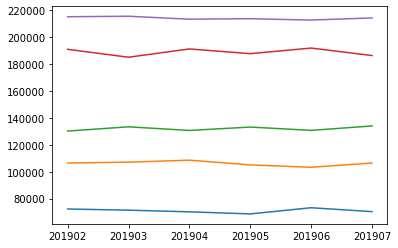

In [25]:
plt.plot(list(gr_data.index),gr_data['price'])
# plt.plot(list(gr_data.index),gr_data['PC-B'],label='PC-B')
# plt.plot(list(gr_data.index),gr_data['PC-C'],label='PC-C')
# plt.plot(list(gr_data.index),gr_data['PC-D'],label='PC-D')
# plt.plot(list(gr_data.index),gr_data['PC-E'],label='PC-E')
plt.show()

<AxesSubplot:>

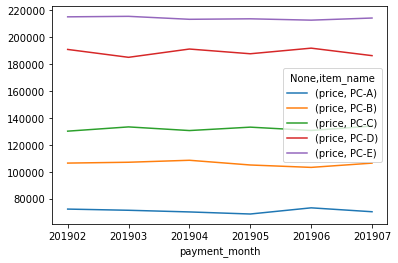

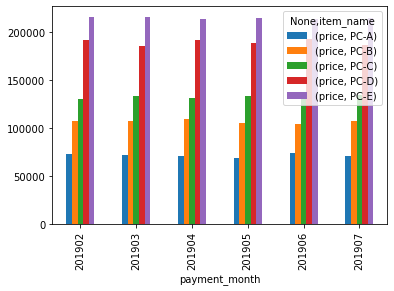

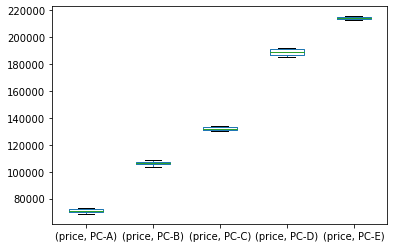

In [36]:
gr_data.plot()
gr_data.plot.bar()
gr_data.plot.box()

In [39]:
tran_join.age.describe()

count    7144.000000
mean       50.265677
std        17.190314
min        20.000000
25%        36.000000
50%        50.000000
75%        65.000000
max        80.000000
Name: age, dtype: float64

In [77]:
# 범주화
age_cut=pd.cut(tran_join.age,6)
print(age_cut.dtypes)
tran_join['age_cut']=pd.cut(tran_join.age,6)
print(tran_join['age_cut'])


category
0       (19.94, 30.0]
1        (70.0, 80.0]
2        (40.0, 50.0]
3        (40.0, 50.0]
4        (70.0, 80.0]
            ...      
7139     (60.0, 70.0]
7140     (70.0, 80.0]
7141     (30.0, 40.0]
7142     (50.0, 60.0]
7143     (70.0, 80.0]
Name: age_cut, Length: 7144, dtype: category
Categories (6, interval[float64]): [(19.94, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0]]


In [79]:
tran_join['age_cut2']=pd.cut(tran_join['age'], bins=[20,30,40,50,60,70,80],labels=['30대이하','40대이하','50대이하','60대이하','70대이하','70대이상'])

In [80]:
# 연령별 상품구매 비교
lm_data=tran_join.groupby(['age_cut2']).sum()[['price']]
lm_data

,price
age_cut2,
30대이하,154630000
40대이하,153350000
50대이하,169405000
60대이하,164380000
70대이하,171080000
70대이상,145605000


In [85]:
tran_join.dtypes

detail_id                     int64
transaction_id               object
item_id                      object
quantity                      int64
payment_date         datetime64[ns]
customer_id                  object
customer_name                object
registration_date            object
email                        object
gender                       object
age                           int64
birth                        object
pref                         object
item_name                    object
item_price                    int64
price                         int64
payment_month                object
age_cut                    category
age_cut2                   category
dtype: object

<AxesSubplot:xlabel='age_cut2'>

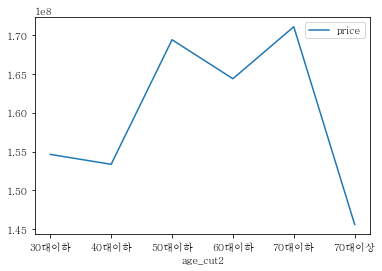

In [81]:
lm_data.plot()

<AxesSubplot:xlabel='age', ylabel='price'>

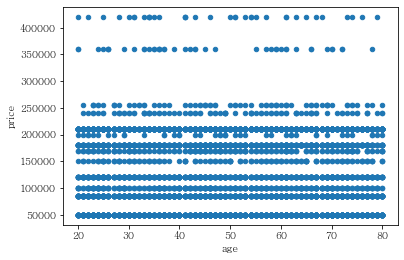

In [87]:
tran_join.plot.scatter('age','price')

In [64]:
#폰트지정
import matplotlib
import matplotlib.pyplot as pd
matplotlib.rcParams['font.family']='batang'
matplotlib.rcParams['font.size']='10'

In [70]:
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [88]:
lm_data3=tran_join.groupby(['gender','pref','item_name','age_cut2']).sum()[['price']].unstack()

<AxesSubplot:xlabel='gender,pref,item_name'>

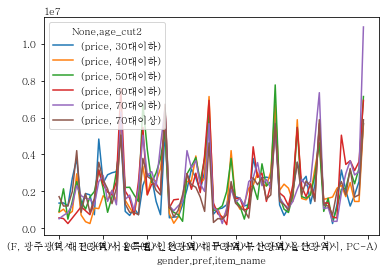

In [90]:
lm_data3.plot.line()

<AxesSubplot:xlabel='pref'>

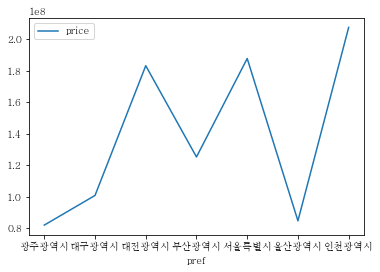

In [92]:
tran_join.groupby(['pref']).sum()[['price']].plot()